In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
adv_df = pd.read_csv("Advertising.csv")

In [5]:
adv_df.shape


(200, 4)

In [6]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
adv_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
adv_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
adv_df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

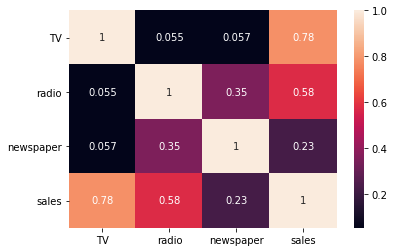

In [10]:
sns.heatmap(adv_df.corr(), annot= True)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

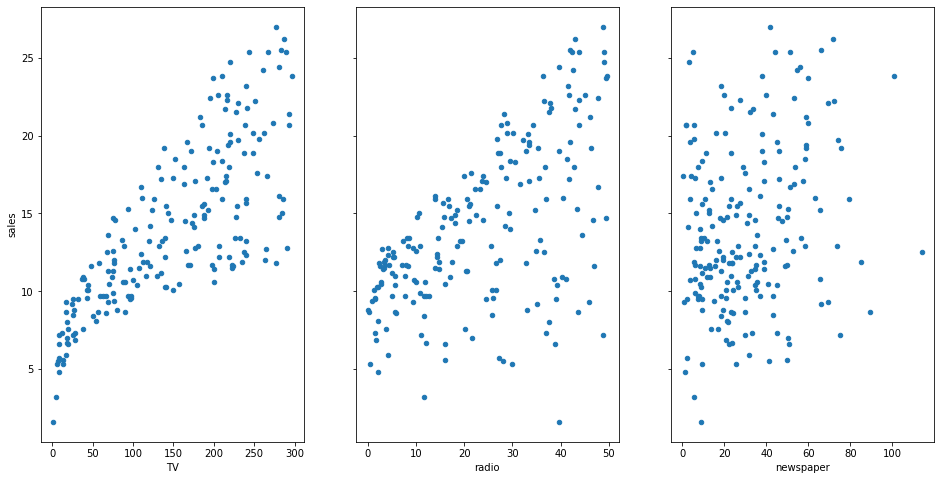

In [17]:
fig,axs = plt.subplots(1,3,sharey=True)
adv_df.plot(kind='scatter', x='TV', y='sales',ax=axs[0],figsize=(16,8))
adv_df.plot(kind='scatter', x='radio', y='sales',ax=axs[1],figsize=(16,8))
adv_df.plot(kind='scatter', x='newspaper', y='sales',ax=axs[2],figsize=(16,8))

In [18]:
feature_cols =['TV']

X= adv_df[feature_cols]
y= adv_df.sales

In [19]:
type(X)

pandas.core.frame.DataFrame

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X,y)

LinearRegression()

In [26]:
model.score(X,y)

0.611875050850071

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.score(X_train,y_train)

0.5736021199591975

In [31]:
model.score(X_test, y_test)

0.6714477229302764

In [32]:
y_preds = model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,y_preds)

0.6714477229302764

In [35]:
model.intercept_

7.23945983075114

In [36]:
model.coef_

array([0.0464078])

In [37]:
feature_cols=['TV','radio','newspaper']

In [39]:
y= adv_df.sales
X =adv_df[feature_cols]

In [41]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=13)

In [42]:
mlr_model = LinearRegression()

In [43]:
mlr_model.fit(X_train,y_train)

LinearRegression()

In [44]:
mlr_model.intercept_

2.7222677896747527

In [45]:
mlr_model.coef_

array([ 4.68259214e-02,  1.85183798e-01, -7.24453599e-05])

In [46]:
y_preds = mlr_model.predict(X_test)

In [47]:
r2_score(y_test,y_preds)

0.933219070930032

In [48]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_test,y_preds)

2.116230321929835

In [51]:
np.sqrt(mean_squared_error(y_test,y_preds)) #RMSE or the cost function

1.454726889120372

In [52]:
#lower the RMSE value, better is the model.

In [53]:
#improve by Regularization

In [54]:
from sklearn.linear_model import Ridge

In [55]:
ridgeRef = Ridge(alpha=0.01,normalize=True)

In [57]:
ridgeRef.fit(X_train, y_train)

Ridge(alpha=0.01, normalize=True)

In [58]:
y_preds = ridgeRef.predict(X_test)

In [59]:
mean_squared_error(y_test,y_preds)

2.1033609203074604

In [60]:
np.sqrt(mean_squared_error(y_test,y_preds))

1.4502968386876738

In [61]:
r2_score(y_test,y_preds)

0.9336251848525151

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lassoReg = Lasso(alpha=0.01,normalize=True)

In [65]:
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.01, normalize=True)

In [66]:
y_preds = lassoReg.predict(X_test)

In [67]:
mean_squared_error(y_test,y_preds)

2.1131723462506846

In [68]:
np.sqrt(mean_squared_error(y_test,y_preds))

1.453675461115955

In [69]:
r2_score(y_test,y_preds)

0.9333155700940459

In [70]:
from sklearn.linear_model import ElasticNet

In [71]:
elastReg = ElasticNet(alpha=0.01,normalize=True)

In [73]:
elastReg.fit(X_train, y_train)

ElasticNet(alpha=0.01, normalize=True)

In [74]:
y_preds = elastReg.predict(X_test)

In [75]:
mean_squared_error(y_test,y_preds)

7.1668680020245565

In [76]:
np.sqrt(mean_squared_error(y_test,y_preds))

2.677100670879703

In [77]:
r2_score(y_test,y_preds)

0.7738383678102813